# Global Measures of Spatial Autocorrelation

a) examination of spatial distributions

b) clustered vs random patterns

c) test for global autocorrelation

d) diagnostics for spatial autocorrelation

## Spatially Autocorrelated Events

We'll be examining the spatial processes that may involve dependencies among the analysis areas. Such dependencies are often termed spatial autocorrelation. Tests for global autocorrelation typically involve evaluating whether or not a process is random distributed over a region. While many individual geographic features may be examined in this respect, global test produce a single measure for a study area that can be used to help reason about the extent to which spatial autocorrelation may or may not be a factor. 

In [1]:
# Load relevant R packages
inLibraries = list('repr','rgdal','spdep','classInt')
for (rpack in inLibraries) {
  if (is.element(rpack,installed.packages()[,1])){           
      #Load the library into R
      suppressMessages(library(rpack,character.only = TRUE))      
    }
    else {
        print(paste("Warning:  ",rpack," is not an installed package"))
    }
}
#resize plot area
options(repr.plot.width=6, repr.plot.height=6)

Warning message:
"package 'rgdal' was built under R version 3.4.2"Warning message:
"package 'sp' was built under R version 3.4.2"Warning message:
"package 'spdep' was built under R version 3.4.2"Warning message:
"package 'classInt' was built under R version 3.4.2"

In [2]:
#Read in the featureclass
inFeatures <- readOGR("datasets/washington","WAfn")

OGR data source with driver: ESRI Shapefile 
Source: "datasets/washington", layer: "WAfn"
with 900 features
It has 6 fields


In [3]:
peek <- head(inFeatures@data)
peek

,Id,ConfigA,ConfigB,ConfigC,ConfigD,ConfigE
0,0,75,70,28,43,92
1,0,54,59,26,40,21
2,0,85,17,99,66,24
3,0,76,70,94,96,37
4,0,32,99,93,38,97
5,0,96,8,2,93,27


### Visualize the polygon geography

As you can see, this is simply a regularly spaced set of square polygons.

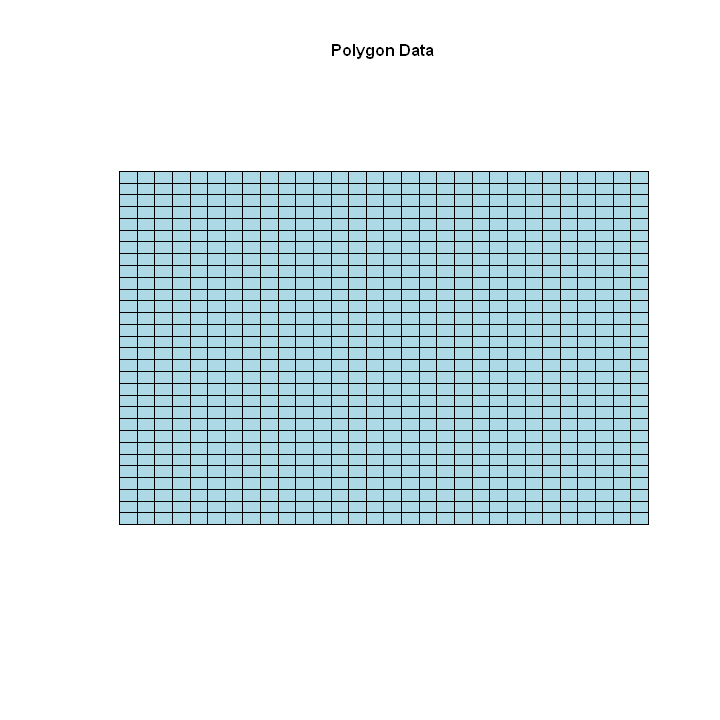

In [4]:
#plot the polygon data
plot(inFeatures, col = 'lightblue', lwd = 0.2, 
                 main = "Polygon Data", cex.main = 0.8)

## Feature Attribute to Analyze

In most assessments of spatial autocorrelation, some attribute of each feature is compared relative to that of it's neighbors. Therefore, let's select an attribute to analyze. Here, five different distributions of the same attribute (it's a made up attibute

In [5]:
peek

,Id,ConfigA,ConfigB,ConfigC,ConfigD,ConfigE
0,0,75,70,28,43,92
1,0,54,59,26,40,21
2,0,85,17,99,66,24
3,0,76,70,94,96,37
4,0,32,99,93,38,97
5,0,96,8,2,93,27


In [6]:
#retrieve variables
inVa <- inFeatures$ConfigA
inVb <- inFeatures$ConfigB
inVc <- inFeatures$ConfigC
inVd <- inFeatures$ConfigD
inVe <- inFeatures$ConfigE

## Map the Different Configurations

In the 5 configurations outlined below, the data have been classified to highlight intentional clusters of high/low values in some instances.

## Configuration A

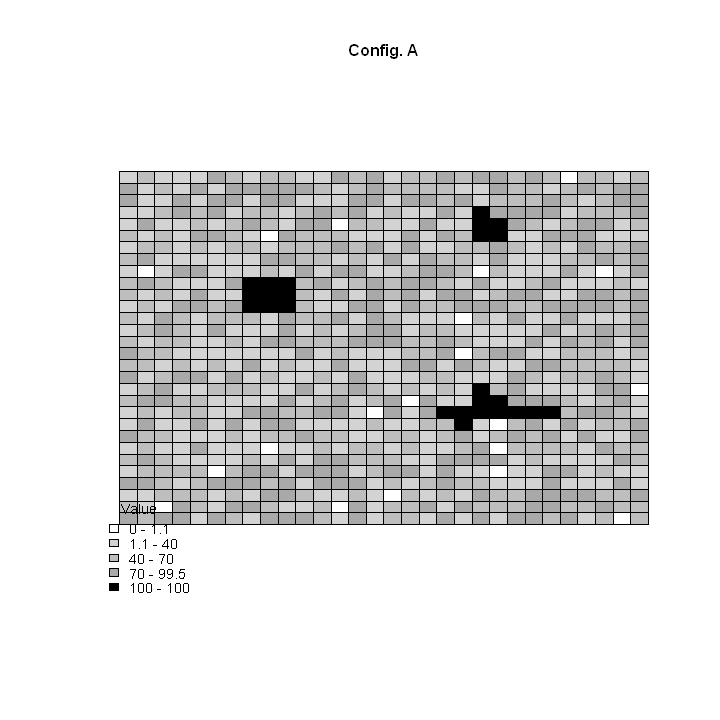

In [7]:
#classify variable
numcat <- 5

z <- classIntervals(inVa, n = numcat, style = "fixed",
                        fixedBreaks = c(0, 1.1, 40, 70, 99.5, 100))

pal <- c("white", "lightgray", "gray", "darkgray", "black")

cols <- findColours(z, pal)

#plot variable    
plot(inFeatures, col = cols, lwd = 0.2, 
         main = "Config. A", cex.main = 0.8)

brks <- round(z$brks,3)

leg.text <- paste(brks[-numcat], brks[-1], sep=" - ")

legend("bottomleft", fill = attr(cols,"palette"), legend = leg.text,
                   bty = "n", title = "Value", cex = 0.7)

## Configuration B

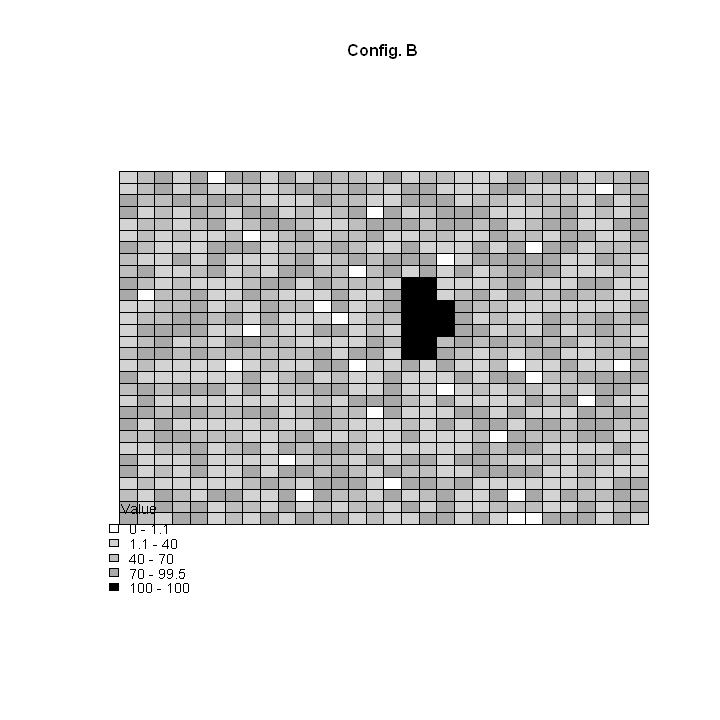

In [8]:
#classify variable
numcat <- 5

z <- classIntervals(inVb, n = numcat, style = "fixed",
                        fixedBreaks = c(0,1.1,40,70,99.5,100))

pal <- c("white","lightgray","gray","darkgray","black")

cols <- findColours(z, pal)

#plot variable
plot(inFeatures, col = cols, lwd = 0.2, main = "Config. B", cex.main = 0.8)

brks <- round(z$brks,3)

leg.text <- paste(brks[-numcat], brks[-1], sep=" - ")

legend("bottomleft", fill = attr(cols,"palette"),
           legend = leg.text, bty = "n", title = "Value", cex = 0.7)

## Configuration C

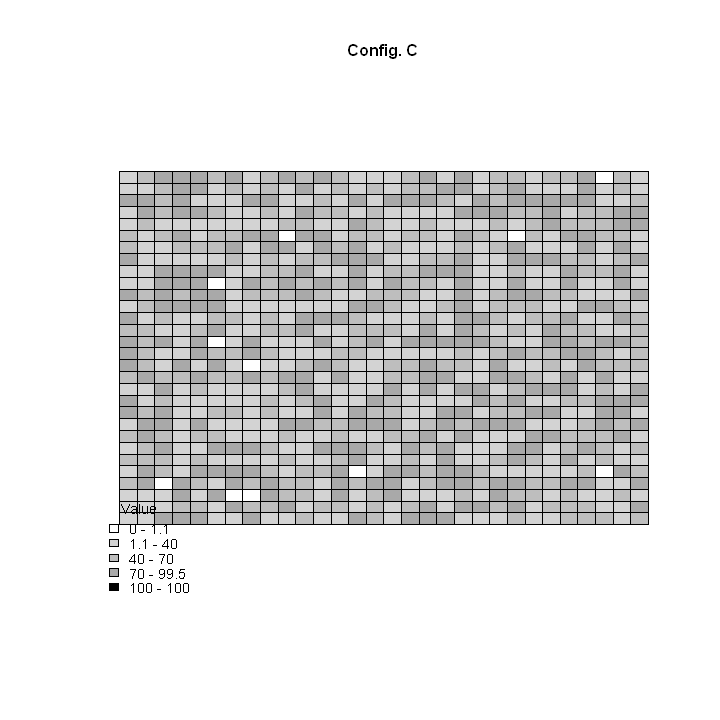

In [9]:
#classify variable
numcat <- 5

z <- classIntervals(inVc, n = numcat, style = "fixed",
                        fixedBreaks = c(0,1.1,40,70,99.5,100))
    
pal <- c("white","lightgray","gray","darkgray","black")

cols <- findColours(z, pal)

#plot variable
plot(inFeatures, col = cols, lwd = 0.2, main = "Config. C", cex.main = 0.8)

brks <- round(z$brks,3)

leg.text <- paste(brks[-numcat], brks[-1], sep=" - ")

legend("bottomleft",fill=attr(cols,"palette"),
           legend=leg.text,bty="n",title="Value",cex=.7)

## Configuration D

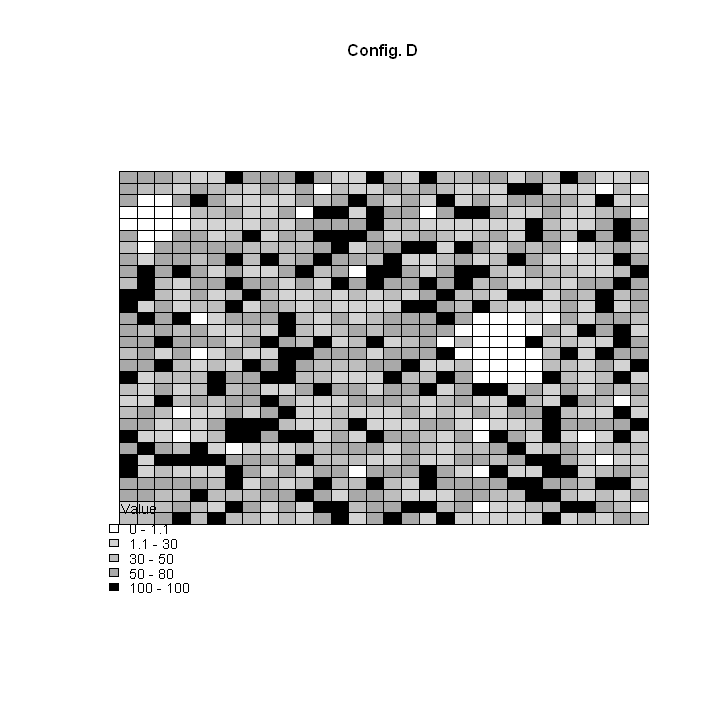

In [10]:
#classify variable
numcat <- 5

z <- classIntervals(inVd,n=numcat, style="fixed",
                        fixedBreaks=c(0,1.1,30,50,80,100))

pal <- c("white","lightgray","gray","darkgray","black")

cols <- findColours(z, pal)

#plot variable
plot(inFeatures,col=cols, lwd=.2,main="Config. D",cex.main=.8)

brks <- round(z$brks,3)

leg.text <- paste(brks[-numcat], brks[-1], sep=" - ")

legend("bottomleft",fill=attr(cols,"palette"),
       legend=leg.text,bty="n",title="Value",cex=.7)

## Configuration E

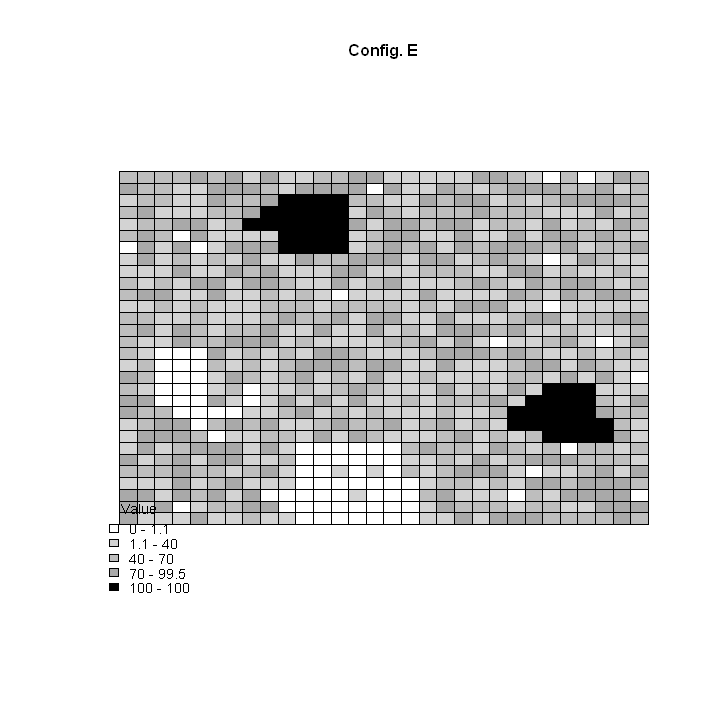

In [11]:
#classify variable
numcat <- 5

z <- classIntervals(inVe,n=numcat, style="fixed",
                        fixedBreaks=c(0,1.1,40,70,99.5,100))

pal <- c("white","lightgray","gray","darkgray","black")

cols <- findColours(z, pal)

#plot variable    
plot(inFeatures,col=cols, lwd=.2, main="Config. E",cex.main=.8)

brks <- round(z$brks,3)

leg.text <- paste(brks[-numcat], brks[-1], sep=" - ")

legend("bottomleft",fill = attr(cols,"palette"),
               legend=leg.text,bty="n",title="Value",cex=.7)

## Test for Global Spatial Autocorrelation

While some of the configurations outlined above do contain some clear instances of spatial autocorrelation given how the data values were classified, others are less clear. To test whether or not the distribution of values in this region are significantly different from what would be observed if they were randomly distributed, a global test for autocorrelation can be applied. In other words, given the relationships among all features in the region, a single summary metric can be produced to test the null hypothesis that the variable of interest is randomly distributed among the set of features being analyzed. 

### Moran's I

Several global test statistics will be covered in the practices, but here, let's examine what is known as the global Moran test. If the p-value of the test indicates the test is significant, the null hypothesis can be rejected.  The value of Moran's I ranges [-1,1] with 0.0 indicating no spatial autocorrelation. A value greater than 0.0 would indicate presence of positive spatial autocorrelation. The moran.test() function (spdep library) can be applied to compute the global Moran's I statistic. The moran.test() function can be populated with a variety of arguments... 

moran.test(x, listw, randomisation=TRUE, zero.policy=NULL,alternative="greater", rank = FALSE, na.action=na.fail, spChk=NULL, adjust.n=TRUE)

The first argument 'x' is the name of the analysis variable which we computed earlier. The second argument is the list of neighborhood weights.  Let's generate those next.

Check the spdep documentation for the interpretation of other inputs.

### Defining Neighborhoods

The first step is to define neighborhoods for each feature (square areas in this case). Remember, one way to accomplish this for polygon data is to use the poly2nb() function (spdep library). In this case, let's consider the Queens's criterion for adjacency.

In [12]:
#Identify the neighbors of each feature
inFeatures.nb <- poly2nb(inFeatures, queen = TRUE)

In [13]:
inFeatures.nb[1:10]

[[1]]
[1]  2 31 32

[[2]]
[1]  1  3 31 32 33

[[3]]
[1]  2  4 32 33 34

[[4]]
[1]  3  5 33 34 35

[[5]]
[1]  4  6 34 35 36

[[6]]
[1]  5  7 35 36 37

[[7]]
[1]  6  8 36 37 38

[[8]]
[1]  7  9 37 38 39

[[9]]
[1]  8 10 38 39 40

[[10]]
[1]  9 11 39 40 41

In [14]:
#Retrieve neighborhood list
inFeatures.listb <- nb2listw(inFeatures.nb,style="B")
inFeatures.listw <- nb2listw(inFeatures.nb,style="W")

In [15]:
names(inFeatures.listb)

[1] "style"      "neighbours" "weights"

In [16]:
inFeatures.listb$weights[1:10]

[[1]]
[1] 1 1 1

[[2]]
[1] 1 1 1 1 1

[[3]]
[1] 1 1 1 1 1

[[4]]
[1] 1 1 1 1 1

[[5]]
[1] 1 1 1 1 1

[[6]]
[1] 1 1 1 1 1

[[7]]
[1] 1 1 1 1 1

[[8]]
[1] 1 1 1 1 1

[[9]]
[1] 1 1 1 1 1

[[10]]
[1] 1 1 1 1 1

In [17]:
inFeatures.listw$weights[1:10]

[[1]]
[1] 0.3333333 0.3333333 0.3333333

[[2]]
[1] 0.2 0.2 0.2 0.2 0.2

[[3]]
[1] 0.2 0.2 0.2 0.2 0.2

[[4]]
[1] 0.2 0.2 0.2 0.2 0.2

[[5]]
[1] 0.2 0.2 0.2 0.2 0.2

[[6]]
[1] 0.2 0.2 0.2 0.2 0.2

[[7]]
[1] 0.2 0.2 0.2 0.2 0.2

[[8]]
[1] 0.2 0.2 0.2 0.2 0.2

[[9]]
[1] 0.2 0.2 0.2 0.2 0.2

[[10]]
[1] 0.2 0.2 0.2 0.2 0.2

In [18]:
inFeatures.listb$neighbours[1:10]

[[1]]
[1]  2 31 32

[[2]]
[1]  1  3 31 32 33

[[3]]
[1]  2  4 32 33 34

[[4]]
[1]  3  5 33 34 35

[[5]]
[1]  4  6 34 35 36

[[6]]
[1]  5  7 35 36 37

[[7]]
[1]  6  8 36 37 38

[[8]]
[1]  7  9 37 38 39

[[9]]
[1]  8 10 38 39 40

[[10]]
[1]  9 11 39 40 41

In [19]:
inFeatures.listb$style[1:10]

[1] "B" NA  NA  NA  NA  NA  NA  NA  NA  NA

### Moran Scatterplot

The Moran scatterplot is an useful diagnostic tool for spatial autocorrelation. Along the x-axis, the values of the analysis variable are plotted. Along the y-axis, the mean values associated with the neighborhoods of each observation are plotted.  

The Moran scatterplot can be divided into quadrants based on the means of the variable. So, let me introduce you to: quadrant 1 (upper right), quadrant 2 (upper left), quadrant 3 (lower left), and quadrant 4 (lower right). Generally speaking, values in quadrants 1 and 3 indicate positive spatial autocorrelation, while values in 2 and 4 indicate negative autocorrelation.

The moran.plot() function (spdep library) can be applied to compute a Moran scatterplot.

#### Moran Test - Configuration A

In config. A, several artificial clusters were clearly present. Moran's I produces a p-value of 0.03 which suggests that the null hypothesis can be safely rejected at the 90 and 95 confidence levels. So, in this case the statistic correctly picked up on the spatial autocorrelation.

In [20]:
#Compute Moran's test
Mtest <- moran.test(inVa, inFeatures.listb,randomisation='TRUE',alternative='two.sided')
Mtest


	Moran I test under randomisation

data:  inVa  
weights: inFeatures.listb  

Moran I statistic standard deviate = 2.1632, p-value = 0.03053
alternative hypothesis: two.sided
sample estimates:
Moran I statistic       Expectation          Variance 
     0.0357282418     -0.0011123471      0.0002900492 


#### Moran Scatterplot - Configuration A

The Moran scatterplot for config. A indicates observations in all quadrants. Those in quads 1 and 3 indicate observations that may have positive spatial autocorrelation. It should be noted that the plot doesn't indicate significance of the spatial autocorrelation for each observation though. By default, the moran.plot() function (spdep library) labels points that have a high level of influence.

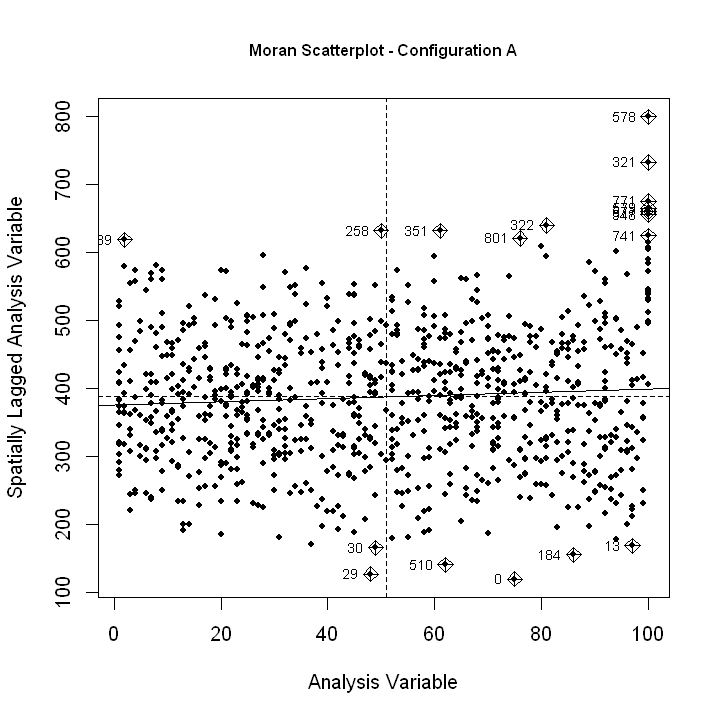

In [21]:
#Produce Moran scatterplot
moran.plot(inVa, inFeatures.listb,
               labels = as.character(inFeatures$FID), pch = 20,
               xlab = "Analysis Variable", ylab = "Spatially Lagged Analysis Variable",
               main = "Moran Scatterplot - Configuration A", cex.main = 0.8)

To see which areas had high influence in the scatterplot, select them and map them out! Below, they are just selected based upon what I could see in the scatterplot. Note that in this example, there are some random values that are considered influential. Also, there are values in each cluster that fall within quadrant 1 (positive spatial autocorrelation). There is also a value in the lower right cluster that falls in quadrant 2 (negative spatial autocorrelation) that is due to it being an area with a very low value next to an area with a very high value.

In [22]:
#select quad influential values
q1vals <- c(84,801,322,578,293,131)
q1selareas <- inFeatures[row.names(inFeatures) %in% q1vals,]

q3vals <- c(541,399)
q3selareas <- inFeatures[row.names(inFeatures) %in% q3vals,]

q2vals <- c(264,129,845,98)
q2selareas <- inFeatures[row.names(inFeatures) %in% q2vals,]

q4vals <- c(720,254,675)
q4selareas <- inFeatures[row.names(inFeatures) %in% q4vals,]

In [23]:
q1selareas@data

,Id,ConfigA,ConfigB,ConfigC,ConfigD,ConfigE
84,0,70,22,4,93,19
131,0,96,63,49,69,1
293,0,100,4,86,72,100
322,0,81,17,91,86,27
578,0,100,58,51,48,60
801,0,76,38,84,50,50


In [24]:
q3selareas@data

,Id,ConfigA,ConfigB,ConfigC,ConfigD,ConfigE
399,0,42,3,35,88,67
541,0,41,5,62,16,16


In [25]:
q2selareas@data

,Id,ConfigA,ConfigB,ConfigC,ConfigD,ConfigE
98,0,40,71,87,69,26
129,0,11,96,4,64,34
264,0,4,90,20,95,100
845,0,23,15,26,47,87


In [26]:
q4selareas@data

,Id,ConfigA,ConfigB,ConfigC,ConfigD,ConfigE
254,0,68,39,72,25,62
675,0,88,72,5,89,83
720,0,58,21,42,62,55


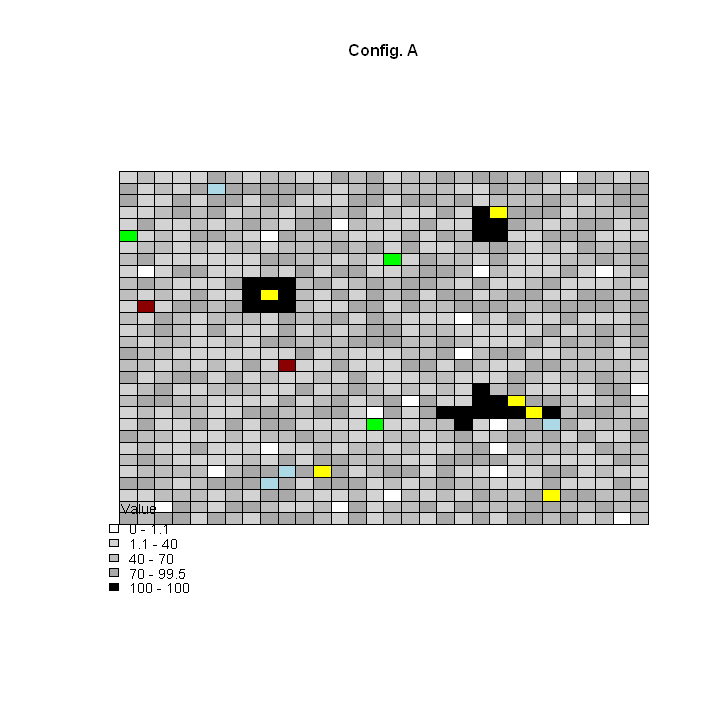

In [27]:
#classify variable
numcat <- 5
z <- classIntervals(inVa, n = numcat, style = "fixed", fixedBreaks = c(0, 1.1, 40, 70, 99.5, 100))
pal <- c("white", "lightgray", "gray", "darkgray", "black")
cols <- findColours(z, pal)

#plot variable
plot(inFeatures, col = cols, lwd = 0.2, main = "Config. A", cex.main = 0.8)
brks <- round(z$brks,3)
leg.text <- paste(brks[-numcat], brks[-1], sep=" - ")
legend("bottomleft", fill = attr(cols,"palette"), legend = leg.text, bty = "n", title = "Value", cex = 0.7)

#plot outliers by quad
plot(q1selareas, col = "yellow", add = TRUE)
plot(q3selareas, col = "red4", add = TRUE)
plot(q2selareas, col = "lightblue", add = TRUE)
plot(q4selareas, col = "green", add = TRUE)

#### Moran Test - Configuration B

In config. B, one artificial cluster was clearly present. Moran's I produces a p-value of 0.4 which suggests that the null hypothesis cannot be safely rejected. So, in this case the statistic did not detect the presence of significant autocorrelation. This was likely due to the single cluster not having enough of an influence given it only represents a small portion of the sites in the analysis area.


	Moran I test under randomisation

data:  inVb  
weights: inFeatures.listb  

Moran I statistic standard deviate = 0.84158, p-value = 0.4
alternative hypothesis: two.sided
sample estimates:
Moran I statistic       Expectation          Variance 
     0.0132214227     -0.0011123471      0.0002900848 


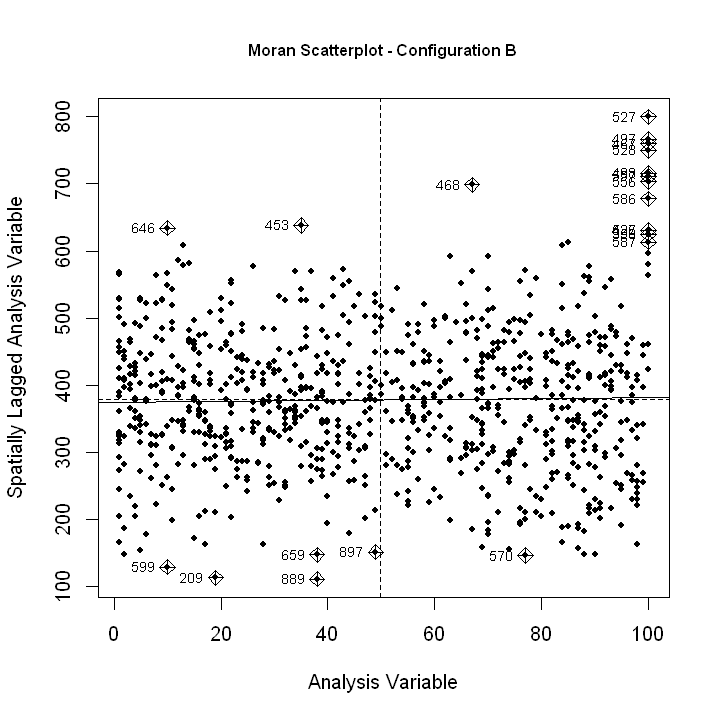

In [28]:
#Compute Moran's test
Mtest <- moran.test(inVb, inFeatures.listb, randomisation = 'TRUE', alternative = 'two.sided')
Mtest

#Produce Moran scatterplot
moran.plot(inVb, inFeatures.listb, labels = as.character(inFeatures$FID), pch = 20,
           xlab = "Analysis Variable", ylab="Spatially Lagged Analysis Variable",
           main = "Moran Scatterplot - Configuration B", cex.main = 0.8)

#### Moran Test - Configuration C

In config. C, all areas were assigned random values. Moran's I produces a p-value of 0.5775 which suggests that the null hypothesis cannot be rejected under any reasonable confidence level. Thus, the statistic correctly pickup on the presence of random values.


	Moran I test under randomisation

data:  inVc  
weights: inFeatures.listb  

Moran I statistic standard deviate = -0.55711, p-value = 0.5775
alternative hypothesis: two.sided
sample estimates:
Moran I statistic       Expectation          Variance 
     -0.010600522      -0.001112347       0.000290060 


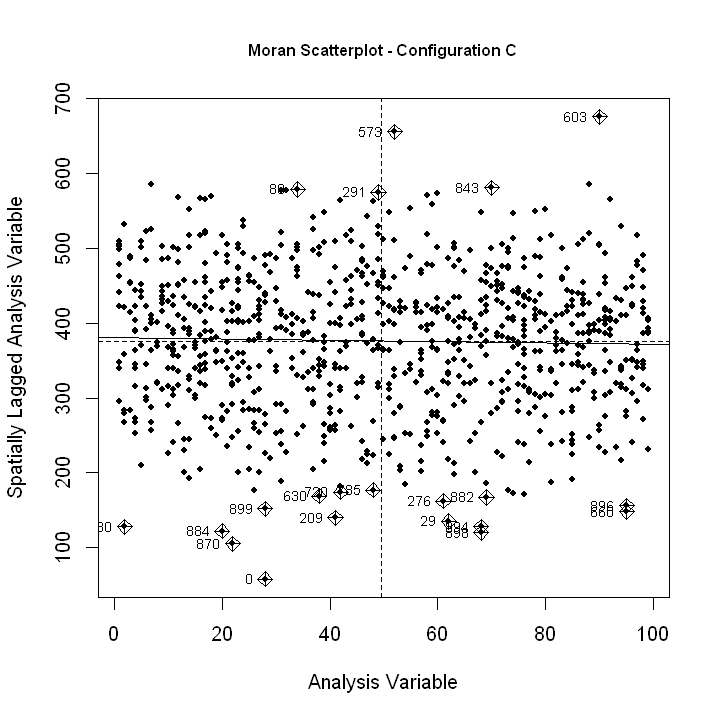

In [29]:
#Compute Moran's test
Mtest <- moran.test(inVc, inFeatures.listb, randomisation='TRUE',alternative='two.sided')
Mtest

#Produce Moran scatterplot
moran.plot(inVc, inFeatures.listb, labels = as.character(inFeatures$FID), pch = 20,
           xlab = "Analysis Variable", ylab = "Spatially Lagged Analysis Variable",
           main = "Moran Scatterplot - Configuration C", cex.main = 0.8)

#### Moran Test - Configuration D

In config. D, there were several clusters of low values. Moran's I produces a p-value of 2.45e-7 which suggests that the null hypothesis can be safely rejected. So, the statistic sucessfully picked up on the presence of spatial autocorrelation.



	Moran I test under randomisation

data:  inVd  
weights: inFeatures.listb  

Moran I statistic standard deviate = 5.1615, p-value = 2.45e-07
alternative hypothesis: two.sided
sample estimates:
Moran I statistic       Expectation          Variance 
     0.0867942573     -0.0011123471      0.0002900669 


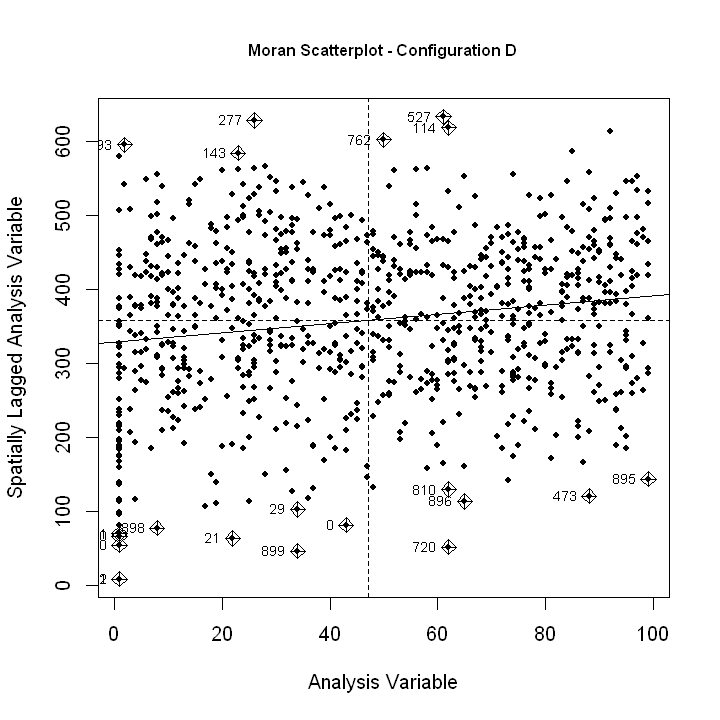

In [30]:
#Compute Moran's test
Mtest <- moran.test(inVd, inFeatures.listb, randomisation = 'TRUE', alternative = 'two.sided')
Mtest

#Produce Moran scatterplot
moran.plot(inVd, inFeatures.listb, labels = as.character(inFeatures$FID), pch = 20,
           xlab = "Analysis Variable", ylab = "Spatially Lagged Analysis Variable",
           main = "Moran Scatterplot - Configuration D", cex.main = 0.8)

#### Moran Test - Configuration E

In config. E, there were areas of clustering of high values and areas with clustering of low values. Moran's I produces a p-value of 2.2e-16 which is clearly significant and indicates that the null hypothesis can be safely rejected. So, in this case the test statistic picked up on the presence of spatial autocorrelation.


	Moran I test under randomisation

data:  inVe  
weights: inFeatures.listb  

Moran I statistic standard deviate = 13.079, p-value < 2.2e-16
alternative hypothesis: two.sided
sample estimates:
Moran I statistic       Expectation          Variance 
     0.2216423044     -0.0011123471      0.0002900833 


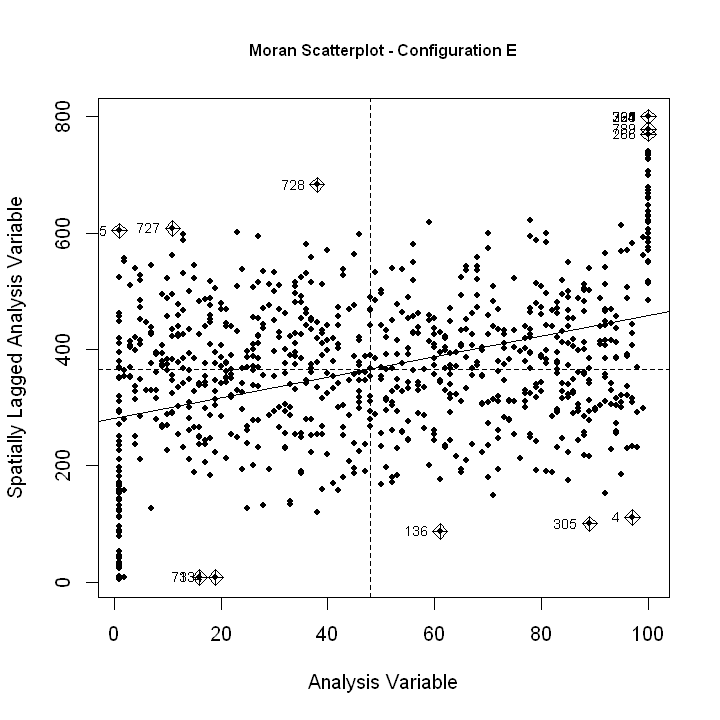

In [31]:
#Compute Moran's test
Mtest <- moran.test(inVe, inFeatures.listb, randomisation = 'TRUE', alternative = 'two.sided')
Mtest

#Produce Moran scatterplot
moran.plot(inVe, inFeatures.listb, labels = as.character(inFeatures$FID), pch = 20,
           xlab = "Analysis Variable", ylab = "Spatially Lagged Analysis Variable", 
           main = "Moran Scatterplot - Configuration E", cex.main = 0.8)